<a href="https://colab.research.google.com/github/Harrde/Practical-Machine-Learning-Project/blob/main/Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              **2021 Final Project** 

*   (APANPS5335_002_2021_3 Machine Learning)
*   Submitted By: Devin Harrison Uni: dh3035
*   Posted: 10/30/2021  |  Due: 12/7/2021





In [122]:
#import Python Packages 
import pandas as pd
import numpy as np    

Question 1 (15 Points)

Perform exploratory analysis to identify issues with the data. This many involve identifying outliers,
and identifying and imputing missing values. Concisely present your results using at most 4 graphs
and/or at most 4 summary tables. You may combine several graphs into one graphic device using
the par(mfrow=c(n, n)) syntax. For example par(mfrow=c(2,2)) would allow you to plot 4
figures in a 2 by 2 grid. **bold text** 


In [123]:
#reading in the data 
train = pd.read_csv("/content/training (2).csv") 
train.apply(lambda x: x.astype(str).str.upper())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,10.0,1,OTHERS,1,0,0,0,1,1,1,0,0,1,AUSTRALIA,NO,NO,NO,5,A,S0,0
1,4.0,0,NAN,1,1,1,0,1,1,0,1,0,1,LEBANON,NO,NO,NO,7,A,NAN,1
2,4.0,1,WHITE-EUROPEAN,1,0,1,1,0,1,1,1,0,1,UNITED STATES,NO,YES,NO,7,A,S0,1
3,7.0,0,MIDDLE EASTERN,0,0,1,0,0,0,1,0,0,1,JORDAN,NO,NO,NO,3,A,S0,0
4,6.0,0,NAN,0,1,1,0,0,0,1,1,0,1,UNITED ARAB EMIRATES,YES,NO,NO,5,A,NAN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,8.0,0,WHITE-EUROPEAN,0,0,1,1,1,1,1,1,0,0,UNITED KINGDOM,NO,NO,NO,6,A,S0,0
269,10.0,0,WHITE-EUROPEAN,1,0,0,0,1,1,1,1,1,1,UNITED KINGDOM,NO,YES,NO,7,A,S0,1
270,4.0,1,OTHERS,0,0,1,0,1,0,1,0,0,0,GEORGIA,YES,YES,NO,3,A,S0,0
271,NAN,0,MIDDLE EASTERN,0,0,1,0,0,0,0,0,0,0,JORDAN,NO,NO,NO,1,A,S0,0


#Outliers Identified 
1. NAN values in X1 (missing values)
2. NAN values in x3 which identifies race of patient (missing values) / others in rows dipicting race 


In [124]:
#Information on Dtypes within data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      267 non-null    float64
 1   x2      273 non-null    int64  
 2   x3      228 non-null    object 
 3   x4      273 non-null    int64  
 4   x5      273 non-null    int64  
 5   x6      273 non-null    int64  
 6   x7      273 non-null    int64  
 7   x8      273 non-null    int64  
 8   x9      273 non-null    int64  
 9   x10     273 non-null    int64  
 10  x11     273 non-null    int64  
 11  x12     273 non-null    int64  
 12  x13     273 non-null    int64  
 13  x14     273 non-null    object 
 14  x15     273 non-null    object 
 15  x16     273 non-null    object 
 16  x17     273 non-null    object 
 17  x18     273 non-null    int64  
 18  x19     273 non-null    object 
 19  x20     228 non-null    object 
 20  y       273 non-null    int64  
dtypes: float64(1), int64(13), object(7)
mem

In [125]:
print(train.shape)

(273, 21)


In [126]:
# Convert the whole dataframe as a string and display
print(train.to_string())
#How do we know what these predictors are predicting?

       x1  x2               x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13                    x14  x15  x16  x17  x18 x19  x20  y
0    10.0   1           Others   1   0   0   0   1   1    1    0    0    1              Australia   no   no   no    5   A   S0  0
1     4.0   0              NaN   1   1   1   0   1   1    0    1    0    1                Lebanon   no   no   no    7   A  NaN  1
2     4.0   1   White-European   1   0   1   1   0   1    1    1    0    1          United States   no  yes   no    7   A   S0  1
3     7.0   0  Middle Eastern    0   0   1   0   0   0    1    0    0    1                 Jordan   no   no   no    3   A   S0  0
4     6.0   0              NaN   0   1   1   0   0   0    1    1    0    1   United Arab Emirates  yes   no   no    5   A  NaN  0
5     4.0   1   White-European   1   1   1   1   1   0    1    1    1    1              Australia  yes   no   no    9   A   S0  1
6    11.0   0   White-European   1   1   1   1   1   1    1    1    1    1              Au

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


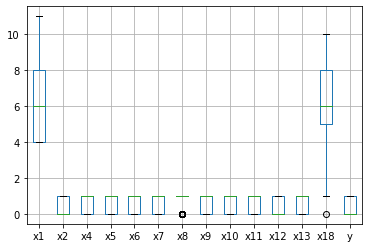

In [127]:
#Boxplot on original data set to identify any outliers within each column
train.boxplot()

In [153]:
#Testing Dropping by dropping NAN values
train1 = train.dropna()
print(train.shape)

(273, 21)


In [154]:
print(train1.to_string())

       x1  x2               x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13                    x14  x15  x16  x17  x18 x19 x20  y
0    10.0   1           Others   1   0   0   0   1   1    1    0    0    1              Australia   no   no   no    5   A  S0  0
2     4.0   1   White-European   1   0   1   1   0   1    1    1    0    1          United States   no  yes   no    7   A  S0  1
3     7.0   0  Middle Eastern    0   0   1   0   0   0    1    0    0    1                 Jordan   no   no   no    3   A  S0  0
5     4.0   1   White-European   1   1   1   1   1   0    1    1    1    1              Australia  yes   no   no    9   A  S0  1
6    11.0   0   White-European   1   1   1   1   1   1    1    1    1    1              Australia   no   no   no   10   A  S0  1
9     4.0   0            Asian   0   0   1   0   0   1    1    0    0    1                  India   no   no   no    4   A  R1  0
10    4.0   0            Asian   0   1   1   1   0   1    0    1    1    1             Bangladesh

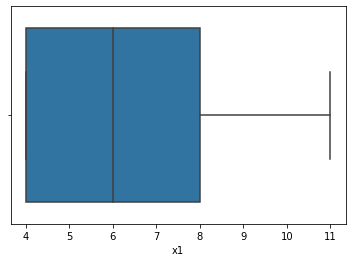

In [130]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Creating dataset
np.random.seed(10)

#Creating plot for each numeric column to identify outliers 
x = sns.boxplot(x=train1['x1'])

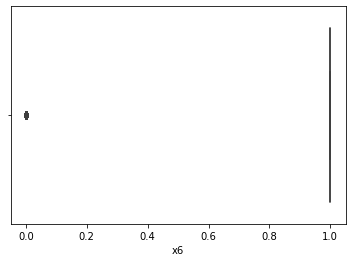

In [131]:
sns.boxplot(x=train1['x6'])  

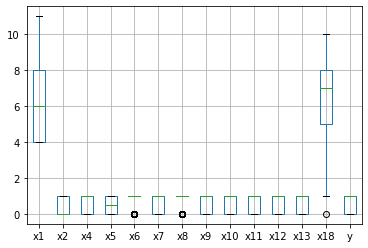

In [132]:
#Box plot on train1 Data set which has all NAN items removed to see various outliers
train1.boxplot()

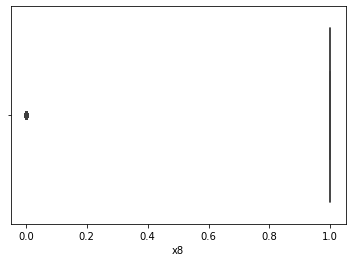

In [13]:
#Column x8 has an outlier of 
sns.boxplot(x=train1['x8'])  

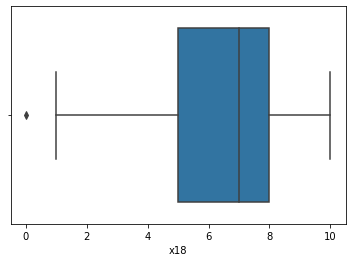

In [133]:
sns.boxplot(x=train1['x18'])

Summarization: Within this dataset in regards to specifict columns, I've identified that within each columns there are very few outliers if any.  The boxplots I think helped identified these various outliers.

Question 2 (15 Points)

Can you think of a reason why deleting the cases with missing values is not a feasible idea?  There can be two possible ways to handle the missing values.  I am listing them as two scenarios.

Scenario 1
Missing values can be imputed with an appropriate technique.  For example, one can impute missing with mean or meadian or mode depending on the data type

Scenario 2
The missing values can be considered as a distinct category, if the mssing occurs in categorical variable.  Some algorthims handles this automatically.  For others, you would have to prepare the data to handle missingness. 

Question 2.1 (5 Points)

Impute missing values as appropriate.  Justify which approach you take.  If you try both approaches, mention that as well.

In [136]:
from sklearn.impute import SimpleImputer

#Reviewing Uncleaned Data Set To begin placement
print(train1.head(10))

#Seeing how data is described 
print(train1.describe())

      x1  x2               x3  x4  x5  x6  x7  ...  x15  x16  x17  x18  x19  x20  y
0   10.0   1           Others   1   0   0   0  ...   no   no   no    5    A   S0  0
2    4.0   1   White-European   1   0   1   1  ...   no  yes   no    7    A   S0  1
3    7.0   0  Middle Eastern    0   0   1   0  ...   no   no   no    3    A   S0  0
5    4.0   1   White-European   1   1   1   1  ...  yes   no   no    9    A   S0  1
6   11.0   0   White-European   1   1   1   1  ...   no   no   no   10    A   S0  1
9    4.0   0            Asian   0   0   1   0  ...   no   no   no    4    A   R1  0
10   4.0   0            Asian   0   1   1   1  ...   no   no   no    7    A   R1  1
11   4.0   1            Black   1   0   0   0  ...   no   no   no    2    A   S0  0
12   4.0   0            Asian   0   0   1   0  ...   no   no   no    7    A   S0  1
15  10.0   0           Others   0   1   0   1  ...   no   no   no    5    A   R1  0

[10 rows x 21 columns]
               x1          x2          x4  ...      

In [137]:
print(train.to_string())

       x1  x2               x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13                    x14  x15  x16  x17  x18 x19  x20  y
0    10.0   1           Others   1   0   0   0   1   1    1    0    0    1              Australia   no   no   no    5   A   S0  0
1     4.0   0              NaN   1   1   1   0   1   1    0    1    0    1                Lebanon   no   no   no    7   A  NaN  1
2     4.0   1   White-European   1   0   1   1   0   1    1    1    0    1          United States   no  yes   no    7   A   S0  1
3     7.0   0  Middle Eastern    0   0   1   0   0   0    1    0    0    1                 Jordan   no   no   no    3   A   S0  0
4     6.0   0              NaN   0   1   1   0   0   0    1    1    0    1   United Arab Emirates  yes   no   no    5   A  NaN  0
5     4.0   1   White-European   1   1   1   1   1   0    1    1    1    1              Australia  yes   no   no    9   A   S0  1
6    11.0   0   White-European   1   1   1   1   1   1    1    1    1    1              Au

In [155]:
#Scenario 1 
#Missing values can be imputed with an appropriate technique. I imputed the missing values with mean, I did this because I'm expecting algorithms to handle missing categorical variables automatically.
train1 = train1.fillna(train.mean())

print(train1.to_string())


       x1  x2               x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13                    x14  x15  x16  x17  x18 x19 x20  y
0    10.0   1           Others   1   0   0   0   1   1    1    0    0    1              Australia   no   no   no    5   A  S0  0
2     4.0   1   White-European   1   0   1   1   0   1    1    1    0    1          United States   no  yes   no    7   A  S0  1
3     7.0   0  Middle Eastern    0   0   1   0   0   0    1    0    0    1                 Jordan   no   no   no    3   A  S0  0
5     4.0   1   White-European   1   1   1   1   1   0    1    1    1    1              Australia  yes   no   no    9   A  S0  1
6    11.0   0   White-European   1   1   1   1   1   1    1    1    1    1              Australia   no   no   no   10   A  S0  1
9     4.0   0            Asian   0   0   1   0   0   1    1    0    0    1                  India   no   no   no    4   A  R1  0
10    4.0   0            Asian   0   1   1   1   0   1    0    1    1    1             Bangladesh

Question 2.2 

Perform subset selection using two approaches. For example, you may use LASSO (or any other
technique, for example ElasticNet). Summarize your results by listing the variables that are most
predictive. Which variables can be dropped?

In [156]:
train1['x15'] = train1['x15'].map(
    {'yes':1, 'no':0})

train1['x16'] = train1['x16'].map(
    {'yes':1, 'no':0})

train1['x17'] = train1['x17'].map(
    {'yes':1, 'no':0})

In [157]:
train1.head(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,10.0,1,Others,1,0,0,0,1,1,1,0,0,1,Australia,0,0,0,5,A,S0,0
2,4.0,1,White-European,1,0,1,1,0,1,1,1,0,1,United States,0,1,0,7,A,S0,1
3,7.0,0,Middle Eastern,0,0,1,0,0,0,1,0,0,1,Jordan,0,0,0,3,A,S0,0
5,4.0,1,White-European,1,1,1,1,1,0,1,1,1,1,Australia,1,0,0,9,A,S0,1
6,11.0,0,White-European,1,1,1,1,1,1,1,1,1,1,Australia,0,0,0,10,A,S0,1
9,4.0,0,Asian,0,0,1,0,0,1,1,0,0,1,India,0,0,0,4,A,R1,0
10,4.0,0,Asian,0,1,1,1,0,1,0,1,1,1,Bangladesh,0,0,0,7,A,R1,1
11,4.0,1,Black,1,0,0,0,0,0,1,0,0,0,United Arab Emirates,0,0,0,2,A,S0,0
12,4.0,0,Asian,0,0,1,0,1,1,1,1,1,1,Bangladesh,0,0,0,7,A,S0,1
15,10.0,0,Others,0,1,0,1,0,1,0,0,1,1,United States,0,0,0,5,A,R1,0


In [ ]:
#Evaluate an lasso Regression Model on the dataset
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

#Split Training Data
# create dataset 
y = train1.y
#Removed categorical columns to run and fit Lasso Regression model.  Could not convert float to strings 
X = train1.drop(['y','x3','x14','x19','x20'], axis = 1)
X.head(10)

#Split data into Test and Train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
train, test = train_test_split(train1)


#Lasso Regression Model Build
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas: 
  lasso.set_params(alpha=a)
  lasso.fit(scale(X_train), y_train)
  coefs.append(lasso.sparse_coef_)



In [ ]:
#Lasso Regression Model and MSE output 

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))
                  

Answer:  I dropped categrical variables (columns: x3, x14, x19, and x20).  I dropped these from my X_train dataset because they didn't allow me to get an accurate read on my model. 

Question 3:
Build a logistic regression classifier and evaluate the model performance using AUC, sensitivity specificity, and F1 score.  Demonstrate your work by showing the code and relavant output and confusion matrix.

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#instantiate the model using the default parameters
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

#prediction 
y_pred=logreg.predict(X_test)

#Metrics for confusion matrix 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[29,  0],
       [ 0, 39]])

In [194]:
#Evaluation of the model 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


Classification report which identified the output of the model's results in regards to accuracy, precison, and recall of model


Question 4 


Build a Random Forest classifier under each scenario and evaluate the performance using AUC, sensitivity, specificity, and F1 score.  Demonstrate your work by showing the code and relavant outputs including ROC/AUC, and confusion matrix.

- Use the default number of trees to build the random forest.  If you use randomForest  R package, the default is ntree = 500.  If you use sklearn, the default is 10 or 100 depending on version. 

- Peform a variable importance measure and re-do the model fitting with the most important predictors only (you determine the criteria of importance).


In [199]:
#Import Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred= clif.predict(X_test)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Classification report which identified the output of the model's results

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier 
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

In [204]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

Question 5


Redo the model building exercise using Support Vector Classifier.  Use linear kernel, polynomial kernel and radial kernels to build your model. 

In [209]:
#Import Packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVC

#SVC Model Build Linear
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train,y_train)

y_pred = svclassifier.predict(X_test)

In [210]:
#Building Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[29  0]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        39

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



Classification report which identified the output of the model's results

In [213]:
#SVC Model build with Poly 
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'poly', degree = 8)
svclassifier.fit(X_train, y_train)

#Making Predictions 

y_pred = svclassifier.predict(X_test)

#Evaluation of Alg
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  0]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.95      0.97        39

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



Classification report which identified the output of the model's results.

In [217]:
#SVC Model build with Poly 
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'rbf', degree = 8)
svclassifier.fit(X_train, y_train)

#Making Predictions 

y_pred = svclassifier.predict(X_test)

#Evaluation of Alg
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  0]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        39

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



Classification report which identified the output of the model's results

Question 6

Repeat the model building process using neural network.  Pay special attention to not to over-fit the training data. 

In [224]:
#Import Libraries 
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit training data only 
scaler.fit(X_train)

StandardScaler(copy = True, with_mean= True, with_std=True)

#transofmrations to data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
#Training the Model 
from sklearn.neural_network import MLPClassifier

#Chose 3 layers with the same number of neurons with 500 max interations
mlp = MLPClassifier(hidden_layer_sizes = (13,13,13), max_iter = 500)

mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [231]:
#Predictions and Evaluation 

predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

#print confusion matrix 

print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[28  1]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.99        39

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68



Classification report identifying the accuracy of the model

Question 7

Finally, summarize your findings in a table that looks like the following.  This must include all the models you've tried and their evaluation metrics.  The goal is to help determining the best model that you will recommend.  Feel free to be creative.  A sample table is given below. 

Quesion 8 (Summary/Recommendations) 

Succinctly summarize your findings through a brief written summary.  Remeber the goals is to predict the medical condition using the available data. 


- Do you have any recommendation on which variables should be used and which can be ignored? 

- What is your recommended model?

Answer: 

- Do you have any recommendation on which variables should be used and which can be ignored? 


**From my analysis, I would leave (columns: x3, x14, x19, and x20) these columns makes it difficult to run the models.  From my experience the models could not convert floats to stings.**

- What is your recommended model?


**My recommended model would be logistic regression simply because it the most commonly used model in ML.  However, all models had similar outcomes.  The numbers were #s were very close.**


----------------------------------------------------------------

Question 10.1

Use data up to and including August 31st 2021 to model the trajectory of COVID influences and deaths.

Question 10.2

Provide an exploratory analysis of the data with a goal to inform the public as well as policymakers to take necessary actions (precautions, preparedness, mitigation).  This may include graphs and summaries such as 

- state level daily percentage increase in infection and deaths.  Perhaps showing only top 10 states by deaths/infestions

- states that are hardest hit as well as those who might become the next New York 

In [298]:
#import Python Packages 
import pandas as pd
import numpy as np    
state = pd.read_csv("/content/us-states.csv")
country = pd.read_csv("/content/us-counties.csv")

In [319]:
state1 = state.nlargest(20,'deaths')
print(state1)

             date       state  fips    cases  deaths
35627  2021-12-09  California     6  5148904   75374
35571  2021-12-08  California     6  5141243   75279
35515  2021-12-07  California     6  5135147   75169
35459  2021-12-06  California     6  5128950   75102
35403  2021-12-05  California     6  5111469   75008
35347  2021-12-04  California     6  5109833   75006
35291  2021-12-03  California     6  5107543   74987
35235  2021-12-02  California     6  5099788   74884
35179  2021-12-01  California     6  5090300   74781
35669  2021-12-09       Texas    48  4360146   74767
35613  2021-12-08       Texas    48  4356555   74685
35123  2021-11-30  California     6  5085477   74670
35557  2021-12-07       Texas    48  4352353   74589
35067  2021-11-29  California     6  5080522   74553
35501  2021-12-06       Texas    48  4347374   74532
35445  2021-12-05       Texas    48  4343389   74512
35389  2021-12-04       Texas    48  4342425   74485
35333  2021-12-03       Texas    48  4340505  

Text(0, 0.5, 'state1.state')

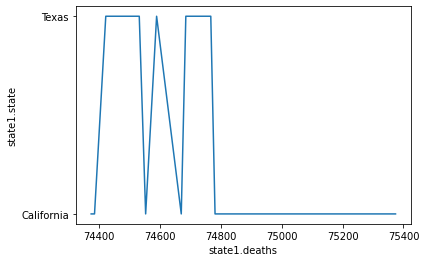

In [327]:
import matplotlib.pyplot as plt
plt.plot(state1.deaths,state1.state)
plt.xlabel('state1.deaths')
plt.ylabel('state1.state')

Text(0, 0.5, 'state1.state')

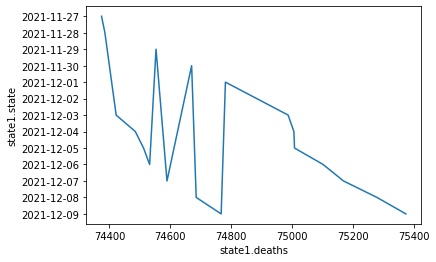

In [328]:
import matplotlib.pyplot as plt
plt.plot(state1.deaths,state1.date)
plt.xlabel('state1.deaths')
plt.ylabel('state1.state')

In [333]:
country1 = country.nlargest(10,'deaths')
print(country1)

               date         county     state  fips    cases   deaths
1997230  2021-12-09  New York City  New York   NaN  1180458  34940.0
1993979  2021-12-08  New York City  New York   NaN  1177016  34925.0
1990728  2021-12-07  New York City  New York   NaN  1175008  34905.0
1987477  2021-12-06  New York City  New York   NaN  1172522  34883.0
1977727  2021-12-03  New York City  New York   NaN  1165550  34867.0
1980977  2021-12-04  New York City  New York   NaN  1165550  34867.0
1984227  2021-12-05  New York City  New York   NaN  1165550  34867.0
1974477  2021-12-02  New York City  New York   NaN  1163161  34856.0
1971228  2021-12-01  New York City  New York   NaN  1160766  34848.0
1967978  2021-11-30  New York City  New York   NaN  1159083  34828.0


Text(0, 0.5, 'country1.state')

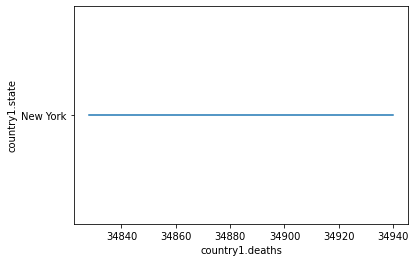

In [335]:
import matplotlib.pyplot as plt
plt.plot(country1.deaths,country1.state)
plt.xlabel('country1.deaths')
plt.ylabel('country1.state')

Text(0, 0.5, 'country1.date')

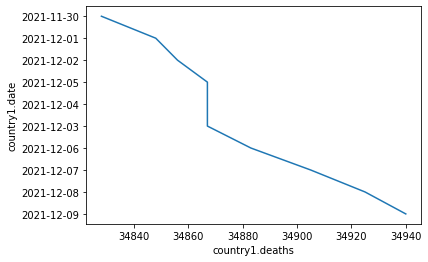

In [337]:
import matplotlib.pyplot as plt
plt.plot(country1.deaths,country1.date)
plt.xlabel('country1.deaths')
plt.ylabel('country1.date')

Question 10.3 

Use the FIPS codes to include additional data to the daily cumulative cases.  The data may include daily average temperate, population density, age distribution (% elderly, for example), among others. 

Can you find any correlates of the infection/deaths?

Question 10.4

Think of modeling the infestion and deaths at the state level.  You may want to start with New Work.  What model would be appropriate for this type od data?

Use your model to predict the situation of for the next two weeks.

Apply your model to the states that are most vulnerable to increased incidences and deaths. 

What conclusion can you draw?

Question 10.5

Now that you've build your model using data up to August 31st 2021, how good your model performs when you compare your predictions with the actual cases for the months of September 2021 and October 2021?


Summarize your findings

Question 11

Last but not the least, the project should look professional as if you are creating it as part of consulting project.  In particular, keep the following in mind,


- do not dumpy R/Python output without explaining what you are trying to do
- provide a brief summary of your findings at the end of computer output
- only print outputs that are relevant and necessary for me to review
- take extra care when printing code and output within the page border when you export to PDF
- code should be well documented and tested 